In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv("jobs.csv")
df

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...
27005,29995,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
27006,29996,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servi...,Operations,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
27007,29997,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
27008,29998,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life ...,Programming & Design,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


In [4]:
# Drop Unnamed column
df = df.drop("Unnamed: 0", axis=1)
df

,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...
27005,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
27006,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servi...,Operations,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
27007,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
27008,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life ...,Programming & Design,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


In [5]:
# Check null values
df.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

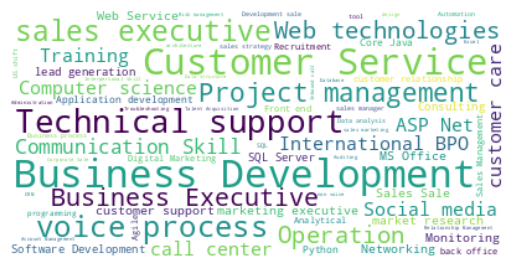

In [6]:
# Find frequent key skills
text = " ".join(i for i in df["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

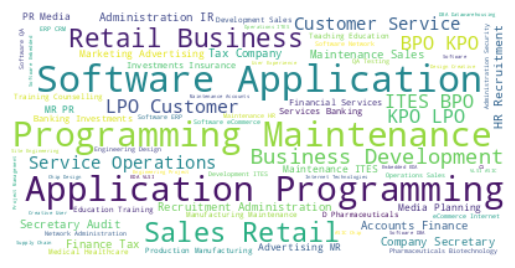

In [7]:
# Find frequent functional areas
text = " ".join(i for i in df["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

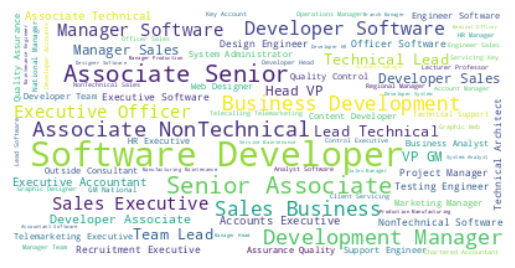

In [8]:
# Find frequent job titles

text = " ".join(i for i in df["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# Use the cosine similarity to create similarity from key skills

feature = df["Key Skills"].tolist()

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03346209,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.02080848,
        0.01744164],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03346209, 0.02080848, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.01744164, ..., 0.        , 0.        ,
        1.        ]])

In [11]:
# Set index based on job title column

indices = pd.Series(df.index, index=df['Job Title']).drop_duplicates()
indices

Job Title
Media Planning Executive/Manager                  0
Sales Executive/Officer                           1
R&D Executive                                     2
Technical Support Engineer                        3
Testing Engineer                                  4
                                              ...  
Software Developer                            27005
Operations Manager                            27006
Lecturer/Professor                            27007
Software Developer                            27008
Search Engine Optimisation /SEO Specialist    27009
Length: 27010, dtype: int64

In [12]:
# Write a job recommendation based on skills required for the job role

def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return df[['Job Title', 'Job Experience Required',
                 'Key Skills']].iloc[newsindices]

jobs_recommendation("Software Developer")

,Job Title,Job Experience Required,Key Skills
6249,Sales/Business Development Manager,4 - 5 yrs,Networking| Printing| Aerospace| Raw material...
6248,Software Developer,2 - 5 yrs,PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...
6247,Associate/Senior Associate -(NonTechnical),5 - 10 yrs,Data analysis| Investment banking| Financial ...
6246,Software Developer,1 - 6 yrs,Coding| Wordpress| Commerce| HTML| Troublesho...
6245,Associate/Senior Associate -(NonTechnical),1 - 4 yrs,client servicing| client support| background ...
